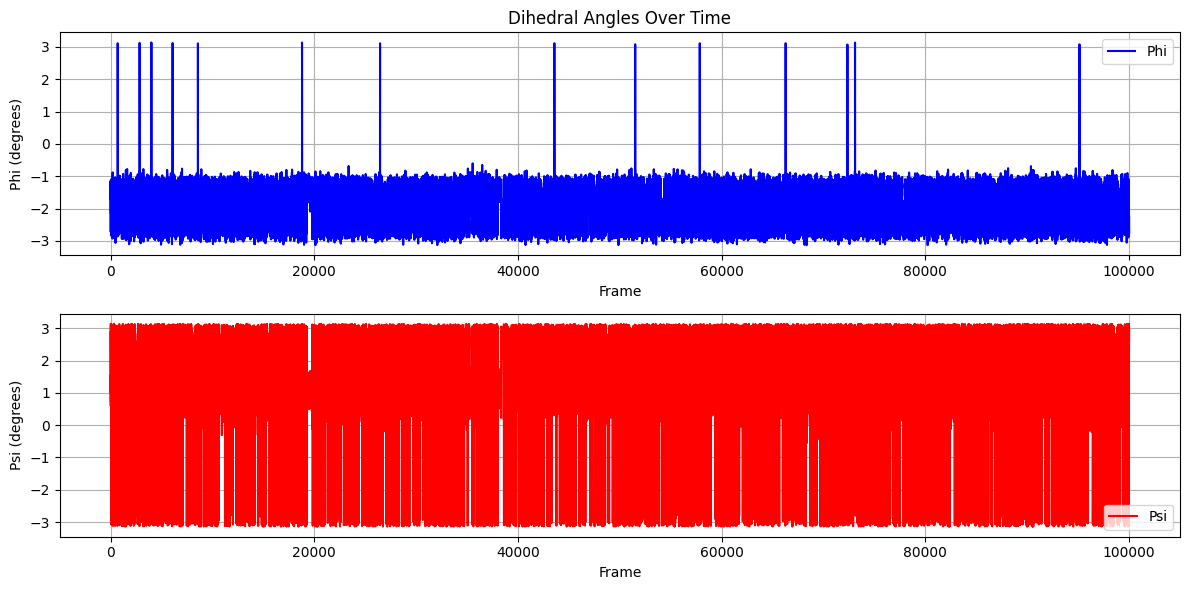

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the COLVAR file
# Adjust the filename and delimiter as necessary
data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/COLVAR', comments=['#', '@'])

# Assuming the first column is the frame number, second is phi, and third is psi
frames = data[:, 0]  # Frame numbers
phi = data[:, 1]     # Phi dihedral
psi = data[:, 2]     # Psi dihedral

# Plotting
plt.figure(figsize=(12, 6))

# Plot Phi
plt.subplot(2, 1, 1)
plt.plot(frames, phi, label='Phi', color='blue')
plt.title('Dihedral Angles Over Time')
plt.ylabel('Phi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

# Plot Psi
plt.subplot(2, 1, 2)
plt.plot(frames, psi, label='Psi', color='red')
plt.ylabel('Psi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('dihedrals_plot.png')
plt.show()


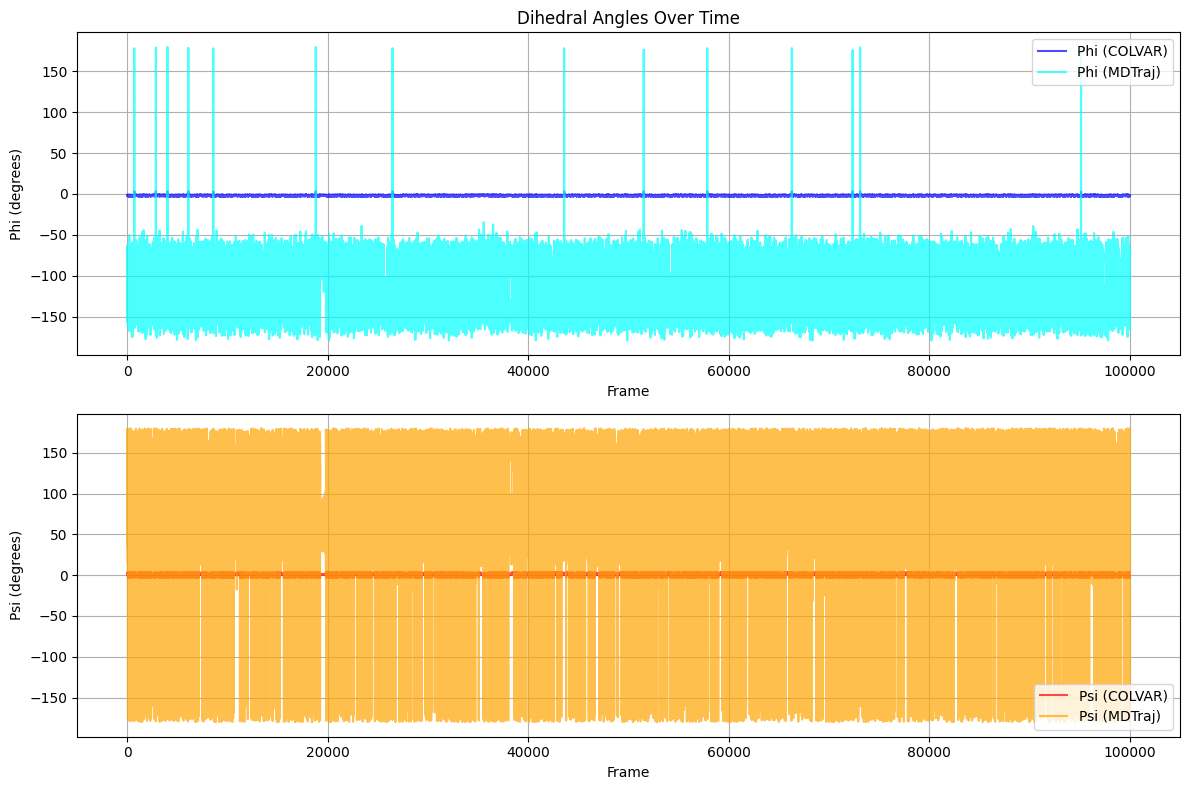

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load the XTC file and the corresponding PDB file
xtc_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/traj_comp.xtc'
pdb_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/dialaA.pdb'

# Load the trajectory
traj = md.load(xtc_file, top=pdb_file)

# Select indices for phi and psi dihedrals
# Ensure the indices match your specific structure
phi_indices = [(5,7,9,15)]  # C (ACE) - N (ALA) - CA (ALA) - C (ALA)
psi_indices = [(7,9,15,17)]  # N (ALA) - CA (ALA) - C (ALA) - N (NME)

# Compute the dihedrals
phi_dihedrals = md.compute_phi(traj, phi_indices)[1]  # Returns angles in radians
psi_dihedrals = md.compute_psi(traj, psi_indices)[1]   # Returns angles in radians

# Convert radians to degrees
phi_dihedrals_deg = np.degrees(phi_dihedrals)
psi_dihedrals_deg = np.degrees(psi_dihedrals)

# Load the COLVAR file

colvar_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/COLVAR', comments=['#', '@'])
frames_colvar = colvar_data[:, 0]
phi_colvar = colvar_data[:, 1]
psi_colvar = colvar_data[:, 2]

# Plotting
plt.figure(figsize=(12, 8))

# Plot Phi
plt.subplot(2, 1, 1)
plt.plot(frames_colvar, phi_colvar, label='Phi (COLVAR)', color='blue', alpha=0.7)
plt.plot(phi_dihedrals_deg, label='Phi (MDTraj)', color='cyan', alpha=0.7)
plt.title('Dihedral Angles Over Time')
plt.ylabel('Phi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

# Plot Psi
plt.subplot(2, 1, 2)
plt.plot(frames_colvar, psi_colvar, label='Psi (COLVAR)', color='red', alpha=0.7)
plt.plot(psi_dihedrals_deg, label='Psi (MDTraj)', color='orange', alpha=0.7)
plt.ylabel('Psi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('dihedrals_comparison_plot.png')
plt.show()


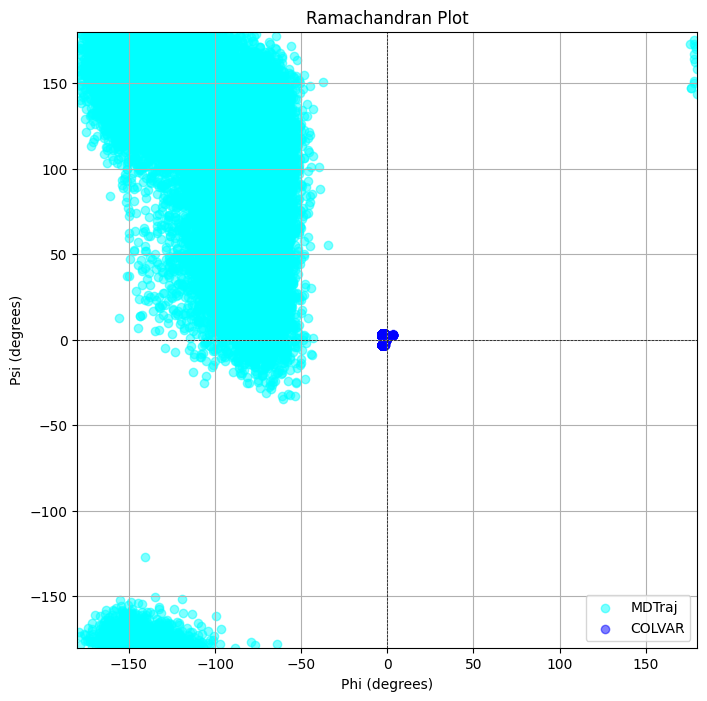

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load the XTC file and the corresponding PDB file
xtc_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/traj_comp.xtc'
pdb_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/dialaA.pdb'

# Load the trajectory
traj = md.load(xtc_file, top=pdb_file)

# Select indices for phi and psi dihedrals
phi_indices = [(5,7,9,15)]  # C (ACE) - N (ALA) - CA (ALA) - C (ALA)
psi_indices = [(7,9,15,17)]  # N (ALA) - CA (ALA) - C (ALA) - N (NME)

# Compute the dihedrals
phi_dihedrals = md.compute_phi(traj, phi_indices)[1]  # Returns angles in radians
psi_dihedrals = md.compute_psi(traj, psi_indices)[1]   # Returns angles in radians

# Convert radians to degrees
phi_dihedrals_deg = np.degrees(phi_dihedrals)
psi_dihedrals_deg = np.degrees(psi_dihedrals)

# Load the COLVAR file
colvar_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/COLVAR', comments=['#', '@'])
phi_colvar = colvar_data[:, 1]
psi_colvar = colvar_data[:, 2]

# Plotting
plt.figure(figsize=(8, 8))

# Scatter plot of phi vs psi from MDTraj
plt.scatter(phi_dihedrals_deg, psi_dihedrals_deg, label='MDTraj', color='cyan', alpha=0.5)

# Scatter plot of phi vs psi from COLVAR
plt.scatter(phi_colvar, psi_colvar, label='COLVAR', color='blue', alpha=0.5)

# Formatting the plot
plt.title('Ramachandran Plot')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.savefig('ramachandran_plot.png')
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load the XTC file and the corresponding PDB file
xtc_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/traj_comp.xtc'
pdb_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/dialaA.pdb'

# Load the trajectory
traj = md.load(xtc_file, top=pdb_file)

# Compute the dihedrals
phi_dihedrals = md.compute_phi(traj, phi_indices)[1]  # Returns angles in radians
psi_dihedrals = md.compute_psi(traj, psi_indices)[1]   # Returns angles in radians

# Convert radians to degrees
phi_dihedrals_deg = np.degrees(phi_dihedrals)
psi_dihedrals_deg = np.degrees(psi_dihedrals)

# Compute standard deviations
phi_std = np.std(phi_dihedrals_deg)
psi_std = np.std(psi_dihedrals_deg)

# Print the results
print(f'Standard Deviation of Phi: {phi_std:.2f} degrees')
print(f'Standard Deviation of Psi: {psi_std:.2f} degrees')

# Load the COLVAR file (optional if you also want to compute standard deviations from COLVAR)
colvar_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/A/COLVAR', comments=['#', '@'])
phi_colvar = colvar_data[:, 1]
psi_colvar = colvar_data[:, 2]

# Compute standard deviations from COLVAR
phi_colvar_std = np.std(phi_colvar)
psi_colvar_std = np.std(psi_colvar)

# Print the results from COLVAR
print(f'Standard Deviation of Phi (COLVAR): {phi_colvar_std:.2f} degrees')
print(f'Standard Deviation of Psi (COLVAR): {psi_colvar_std:.2f} degrees')


Standard Deviation of Phi: 31.73 degrees
Standard Deviation of Psi: 58.72 degrees
Standard Deviation of Phi (COLVAR): 0.55 degrees
Standard Deviation of Psi (COLVAR): 1.02 degrees
